In [4]:
%load_ext jupyter_ai_magics

from datascience import *
import numpy as np


# needed for plotting with datascience module
%matplotlib inline
import matplotlib.pyplot as plots

from IPython.display import display, Image

## Analyzing Airline Delay Data

Let's try analyzing some data on delays at SBA

In [5]:
flights = Table.read_table("data/SBA_On_Time_Performance_2024_Feb.csv")
flights.show(5)

Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
2024,1,2,1,4,2024-02-01,AA,19805,AA,N664AW,298,14107,1410702,30466,PHX,"Phoenix, AZ",AZ,4,Arizona,81,14689,1468902,34689,SBA,"Santa Barbara, CA",CA,6,California,91,1106,1108,2,2,0,0,1100-1159,19,1127,1143,5,1145,1148,3,3,0,0,1100-1159,0,nan,0,99,100,76,1,455,2,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2024,1,2,2,5,2024-02-02,AA,19805,AA,N650AW,298,14107,1410702,30466,PHX,"Phoenix, AZ",AZ,4,Arizona,81,14689,1468902,34689,SBA,"Santa Barbara, CA",CA,6,California,91,1106,1104,-2,0,0,-1,1100-1159,22,1126,1141,6,1145,1147,2,2,0,0,1100-1159,0,nan,0,99,103,75,1,455,2,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2024,1,2,3,6,2024-02-03,AA,19805,AA,N111US,298,14107,1410702,30466,PHX,"Phoenix, AZ",AZ,4,Arizona,81,14689,1468902,34689,SBA,"Santa Barbara, CA",CA,6,California,91,1106,1058,-8,0,0,-1,1100-1159,11,1109,1132,4,1145,1136,-9,0,0,-1,1100-1159,0,nan,0,99,98,83,1,455,2,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2024,1,2,4,7,2024-02-04,AA,19805,AA,N111US,298,14107,1410702,30466,PHX,"Phoenix, AZ",AZ,4,Arizona,81,14689,1468902,34689,SBA,"Santa Barbara, CA",CA,6,California,91,1106,1119,13,13,0,0,1100-1159,23,1142,1209,3,1145,1212,27,27,1,1,1100-1159,0,nan,0,99,113,87,1,455,2,0,0,14,0,13,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2024,1,2,5,1,2024-02-05,AA,19805,AA,N667AW,298,14107,1410702,30466,PHX,"Phoenix, AZ",AZ,4,Arizona,81,14689,1468902,34689,SBA,"Santa Barbara, CA",CA,6,California,91,1106,1500,234,234,1,12,1100-1159,14,1514,1534,4,1145,1538,233,233,1,12,1100-1159,0,nan,0,99,98,80,1,455,2,0,233,0,0,0,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


# What are the different airlines?

In [6]:
flights.group("Reporting_Airline")

Reporting_Airline,count
AA,191
AS,46
OO,215
UA,263
WN,316


In [7]:
flights.group("Origin")

Origin,count
DEN,104
DFW,29
LAS,58
LAX,54
OAK,29
PDX,21
PHX,81
SBA,516
SEA,27
SFO,87


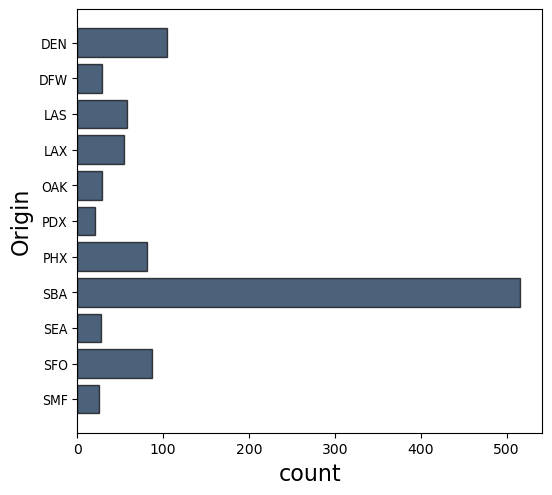

In [10]:
# Now a bar chart
flights.group("Origin").barh("Origin")

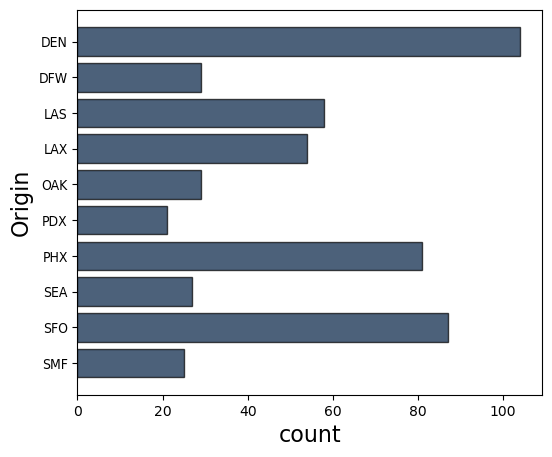

In [30]:
flights.group("Origin").where("Origin",are.not_equal_to("SBA")).barh("Origin")

In [33]:
inbound = flights.where("Origin",are.not_equal_to("SBA"))
outbound = flights.where("Origin",are.equal_to("SBA"))

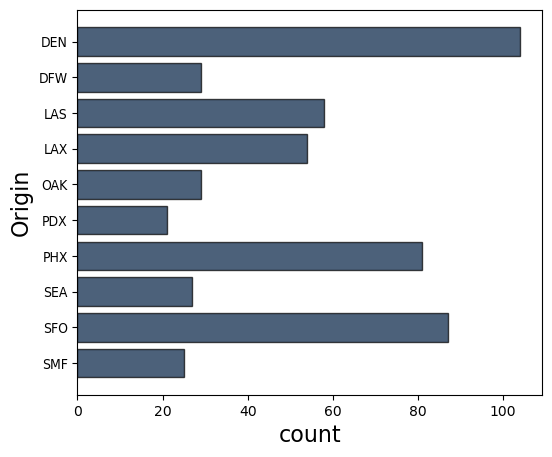

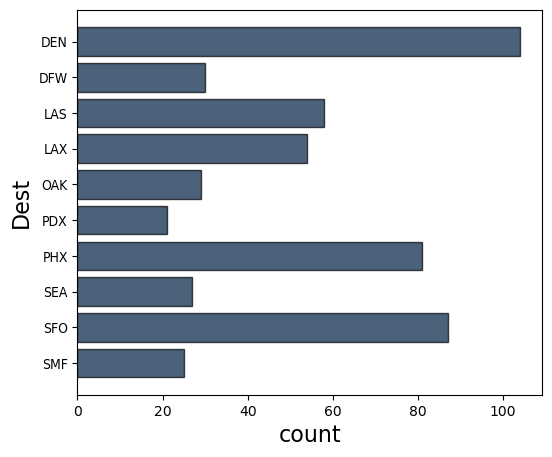

In [36]:
inbound.group("Origin").barh("Origin")
outbound.group("Dest").barh("Dest")

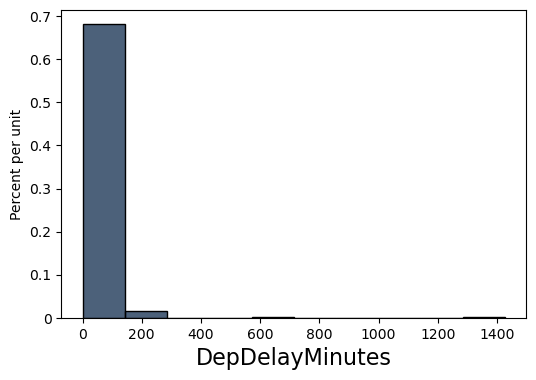

In [37]:
outbound.hist("DepDelayMinutes",bins=10)

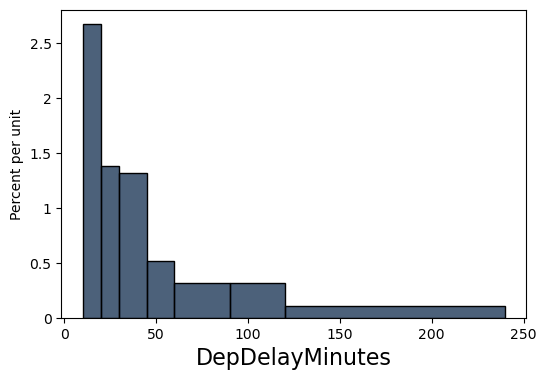

In [39]:
outbound.hist("DepDelayMinutes",bins=[10,20,30,45,60,90,120,240])

In [42]:
outbound.where("DepDelayMinutes",are.above(60))

Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
2024,1,2,5,1,2024-02-05,AA,19805,AA,N667AW,298,14689,1468902,34689,SBA,"Santa Barbara, CA",CA,6,California,91,14107,1410702,30466,PHX,"Phoenix, AZ",AZ,4,Arizona,81,1230,1628,238,238,1,12,1200-1259,12,1640,1841,5,1500,1846,226,226,1,12,1500-1559,0,nan,0,90,78,61,1,455,2,5,0,0,0,221,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2024,1,2,15,4,2024-02-15,AA,19805,AA,N722US,2876,14689,1468902,34689,SBA,"Santa Barbara, CA",CA,6,California,91,14107,1410702,30466,PHX,"Phoenix, AZ",AZ,4,Arizona,81,1651,2052,241,241,1,12,1600-1659,39,2131,2339,5,1923,2344,261,261,1,12,1900-1959,0,nan,0,92,112,68,1,455,2,241,0,20,0,0,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2024,1,2,19,1,2024-02-19,AA,19805,AA,N762US,1386,14689,1468902,34689,SBA,"Santa Barbara, CA",CA,6,California,91,14107,1410702,30466,PHX,"Phoenix, AZ",AZ,4,Arizona,81,629,617,1428,1428,1,12,0600-0659,11,628,827,13,902,840,1418,1418,1,12,0900-0959,0,nan,0,93,83,59,1,455,2,1418,0,0,0,0,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2024,1,2,29,4,2024-02-29,AA,19805,AA,N809AW,2389,14689,1468902,34689,SBA,"Santa Barbara, CA",CA,6,California,91,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,1238,1409,91,91,1,6,1200-1259,27,1436,1920,15,1743,1935,112,112,1,7,1700-1759,0,nan,0,185,206,164,1,1316,6,91,0,21,0,0,1303,37,37,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2024,1,2,5,1,2024-02-05,AS,19930,AS,N585AS,1139,14689,1468902,34689,SBA,"Santa Barbara, CA",CA,6,California,91,14747,1474703,30559,SEA,"Seattle, WA",WA,53,Washington,93,1755,1900,65,65,1,4,1700-1759,15,1915,2114,5,2039,2119,40,40,1,2,2000-2059,0,nan,0,164,139,119,1,908,4,0,0,0,0,40,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2024,1,2,20,2,2024-02-20,AS,19930,AS,N532AS,1139,14689,1468902,34689,SBA,"Santa Barbara, CA",CA,6,California,91,

In [45]:
outbound.where("DepDelayMinutes",are.above(60)).group("Reporting_Airline")

Reporting_Airline,count
AA,4
AS,3
OO,6
UA,20
WN,6


In [46]:
outbound.where("DepDelayMinutes",are.above(60)).group("Dest")

Dest,count
DEN,6
DFW,1
LAS,4
PDX,3
PHX,4
SEA,4
SFO,17
